In [25]:
import mne
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 5]

In [26]:
def SubjFolderSearch(path):
    subjFolders = os.listdir(path)
    AllFolders = []
    for i in subjFolders:
        if '.DS_Store' not in i:
            AllFolders.append(i)
    
    AllFolders_dict = {}
    for eachFolder in AllFolders:
        eachFolderPath = os.path.join(path,eachFolder)
        folderContents = os.listdir(eachFolderPath)
        AllFolders_dict[eachFolder] = [file for file in folderContents if '.set' in file]
       
        
    return AllFolders_dict

In [27]:
#seach all folders and the set files in each folder
path = '/Volumes/flash64/EEGLAB'
AllSetFiles = SubjFolderSearch(path)
print(AllSetFiles)

{'SA20131216': ['20131216_1310.set', '20131216_1441.set'], 'SA20140205': ['20140205_1114.set', '20140205_1230.set'], 'SA20140206': ['20140206_1029.set', '20140206_1151.set'], 'SA20140207': ['20140207_1146.set', '20140207_1219.set'], 'SA20140217': ['20140217_1136.set']}


In [28]:
# read file
np.random.seed(42)
folder_keys = list(AllSetFiles.keys())      
folder = os.path.join(path,folder_keys[1])

set_file = os.path.join(folder, AllSetFiles[folder_keys[1]][1])
raw = mne.io.read_raw_eeglab(set_file, preload=True, verbose = True)

Reading /Volumes/flash64/EEGLAB/SA20140205/20140205_1230.fdt
Reading 0 ... 838231  =      0.000 ...  1637.170 secs...


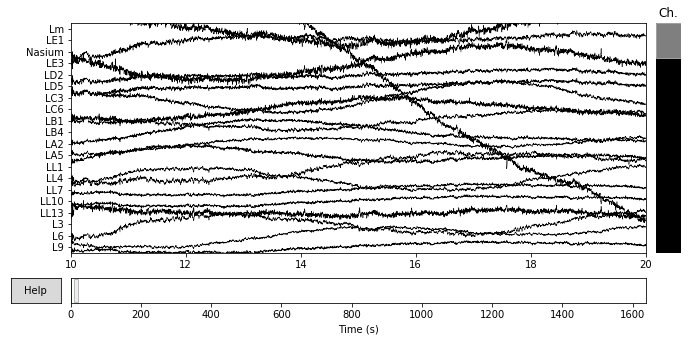

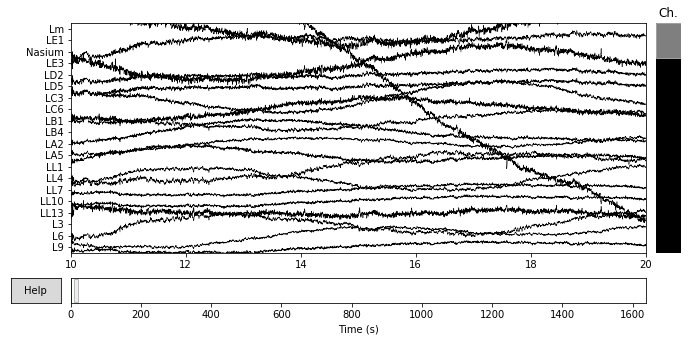

In [30]:
#simple plot
raw.plot(n_channels=20,duration=10,start=10)

In [58]:
events = mne.find_events(raw)

5974 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]


In [59]:
event_id = {'TRIALSTART':31,
            'LEFTBUTTON':131, # only one button code is sent,
            'RIGHTBUTTON':132, # but it may appear before f2 stim if fast response
            'CONGRUENT':133,# only one congruity code is sent
            'INCONGRUENT':134,
            'CORRECT':129, # only one accuracy code is sent
            'INCORRECT':130,
            #target
            'BABY_T':135, 
            'BELL_T':136,
            'BIRD_T':137, 
            'BURP_T':138, 
            'DOG_T':139, 
            'DRUM_T':140, 
            'KNOCK_T':141, 
            'LAUGH_T':142, 
            'PHONE_T':143, 
            'TRAIN_T':144,  
            'WATER_T':145,
            #flanker
            'BABY_F':155, 
            'BELL_F':156,
            'BIRD_F':157, 
            'BURP_F':158, 
            'DOG_F':159, 
            'DRUM_F':160, 
            'KNOCK_F':161, 
            'LAUGH_F':162, 
            'PHONE_F':163, 
            'TRAIN_F':164,  
            'WATER_F':165,
            }
           

In [61]:
epoch = mne.Epochs(raw,events,event_id=event_id,preload=True)

3994 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 3994 events and 359 original time points ...
0 bad epochs dropped


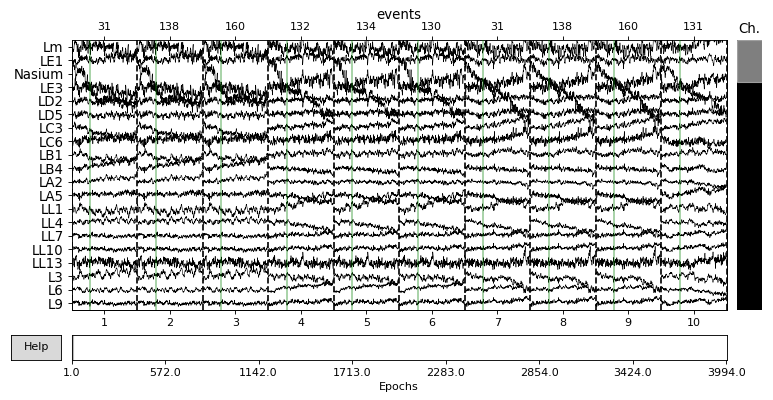

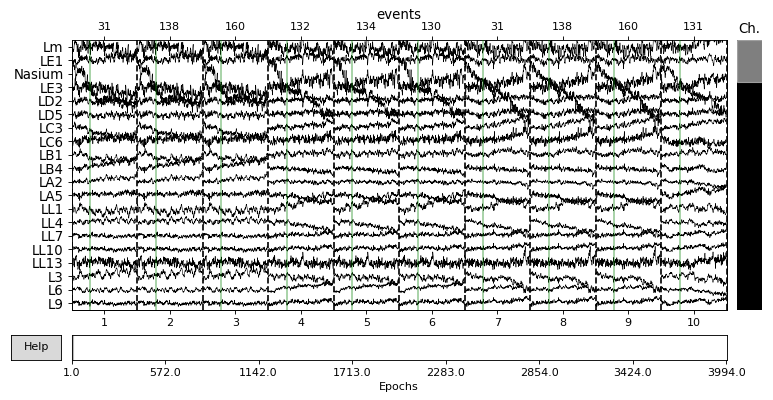

In [64]:
epoch.plot(n_channels=20,n_epochs=10,title='events')